# Random
    
Vsketch implement all of the `random()` and `noise()` family of functions found in Processing.

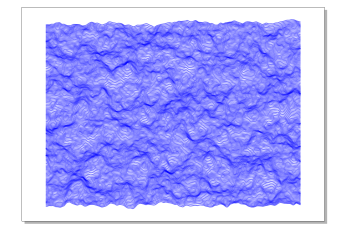

In [1]:
import math

import numpy as np

import vsketch

vsk = vsketch.Vsketch()
vsk.size("a4", landscape=True)
vsk.scale("1cm")

NUM_LINE = 200
Y_OFFSET = 18 / NUM_LINE
X_FREQ = 0.25
Y_FREQ = 4

x_coords = np.linspace(0, 25, 1000)

for i in range(NUM_LINE):
    y_coords = (
        np.array([vsk.noise(x * X_FREQ, i / NUM_LINE * Y_FREQ) for x in x_coords])
        + Y_OFFSET * i
    )
    vsk.polygon(x_coords, y_coords)

vsk.display()
vsk.save("random_lines.svg")


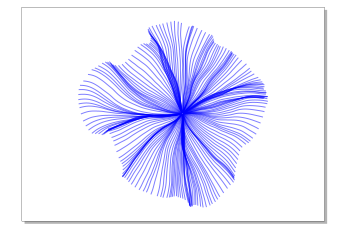

In [2]:
NUM_LINES = 200
POINT_PER_LINE = 100
RDIR_RANGE = math.pi / 6

vsk = vsketch.Vsketch()
vsk.size("a4", landscape=True)
vsk.scale("1cm")
vsk.rotate(-90, degrees=True)


noise_coord = np.linspace(0, 1, POINT_PER_LINE)

dirs = np.linspace(0, 2 * math.pi, NUM_LINES)

for dir in dirs:

    rdir = vsk.map(
        np.array([vsk.noise(x, dir) for x in noise_coord]),
        0,
        1,
        dir - RDIR_RANGE,
        dir + RDIR_RANGE,
    )
    roffset = vsk.map(
        np.array([vsk.noise(x, dir, 100) for x in noise_coord]), 0, 1, 0.05, 0.12
    )

    xoffset = roffset * np.cos(rdir)
    yoffset = roffset * np.sin(rdir)

    vsk.polygon(np.cumsum(xoffset), np.cumsum(yoffset))

vsk.display()
vsk.save("random_flower.svg")